Complex networks assignment

Theodoros Lambrou & Alana Zoloeva



Bitcoin Alpha social network. This is a signed directed network that captures trust/distrust relationships between users on the Bitcoin Alpha platform. 
https://snap.stanford.edu/data/soc-sign-bitcoinalpha.html

Dataset:
The Bitcoin Alpha network represents interactions between users on a Bitcoin trading platform where users can rate each other (positively or negatively) to indicate trust or distrust

Key characteristics:

Directed network (relationships go from one user to another)
Signed edges (positive/negative representing trust/distrust)
Collected from a Bitcoin trading platform called Bitcoin Alpha
Contains 3,783 nodes (users) and 24,186 edges (ratings)
Timespan: October 2010 to January 2016



In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load the Bitcoin Alpha network
edge_list_file = "soc-sign-bitcoinalpha.csv"  # You'll need to download this file
df = pd.read_csv(edge_list_file, sep=',', header=None, 
                 names=['source', 'target', 'rating', 'time'])

# Create a directed graph with signed edges
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['rating'], time=row['time'])

1. Overview

In [3]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the network directed? {nx.is_directed(G)}")

# Distribution of positive and negative ratings
positive_edges = sum(1 for _, _, d in G.edges(data=True) if d['weight'] > 0)
negative_edges = sum(1 for _, _, d in G.edges(data=True) if d['weight'] < 0)
print(f"Positive edges: {positive_edges} ({positive_edges/G.number_of_edges():.2%})")
print(f"Negative edges: {negative_edges} ({negative_edges/G.number_of_edges():.2%})")

Number of nodes: 3783
Number of edges: 24186
Is the network directed? True
Positive edges: 22650 (93.65%)
Negative edges: 1536 (6.35%)


2. Microscale analysis

2.1 Degree distribution

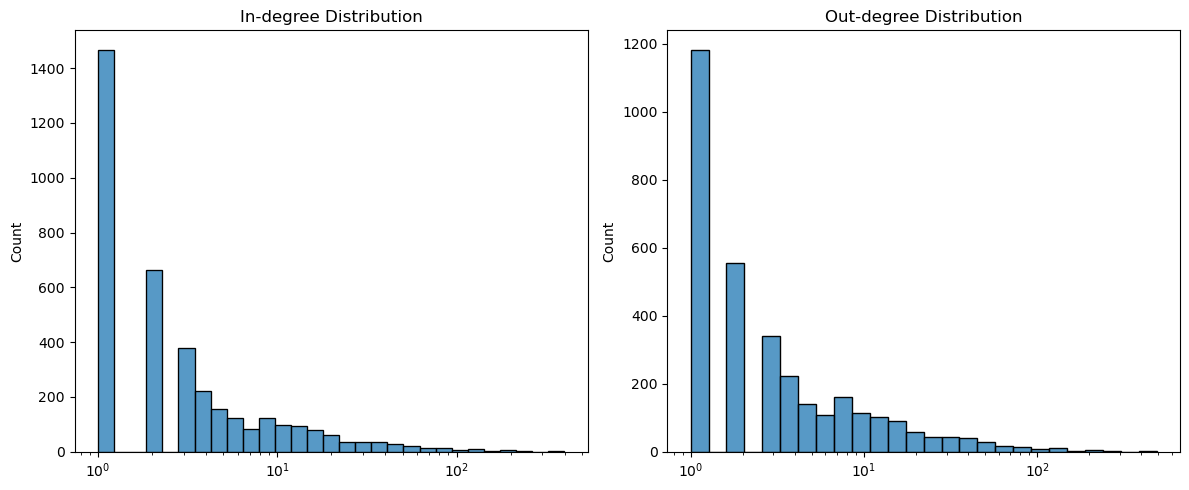

In [5]:
# In-degree and out-degree distributions
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(in_degrees, log_scale=True)
plt.title('In-degree Distribution')
plt.subplot(122)
sns.histplot(out_degrees, log_scale=True)
plt.title('Out-degree Distribution')
plt.tight_layout()

2.2 Node Trust Analysis:

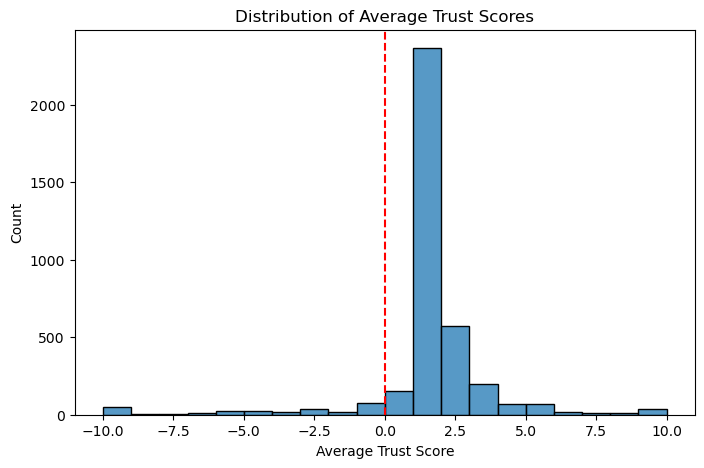

In [6]:
# Trust analysis for nodes
node_trust = {}
for node in G.nodes():
    incoming_ratings = [d['weight'] for _, _, d in G.in_edges(node, data=True)]
    if incoming_ratings:
        avg_trust = sum(incoming_ratings) / len(incoming_ratings)
        node_trust[node] = avg_trust
    else:
        node_trust[node] = 0

# Visualize distribution of average trust scores
plt.figure(figsize=(8, 5))
sns.histplot(list(node_trust.values()), bins=20)
plt.title('Distribution of Average Trust Scores')
plt.xlabel('Average Trust Score')
plt.axvline(x=0, color='r', linestyle='--')

2.3 Centrality Analysis:



In [11]:
# Calculate centrality measures on the largest SCC
pagerank = nx.pagerank(largest_scc)
betweenness = nx.betweenness_centrality(largest_scc)

# Find most central nodes
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by PageRank:")
for node, score in top_pagerank:
    print(f"Node {node}: {score:.6f}")

print("\nTop 10 nodes by Betweenness Centrality:")
for node, score in top_betweenness:
    print(f"Node {node}: {score:.6f}")

Top 10 nodes by PageRank:
Node 1591: 1.000000

Top 10 nodes by Betweenness Centrality:
Node 1591: 0.000000


Macroscale Analysis


3.1 Clustering:


Average clustering coefficient: 0.1671


Text(0.5, 1.0, 'Distribution of Clustering Coefficients')

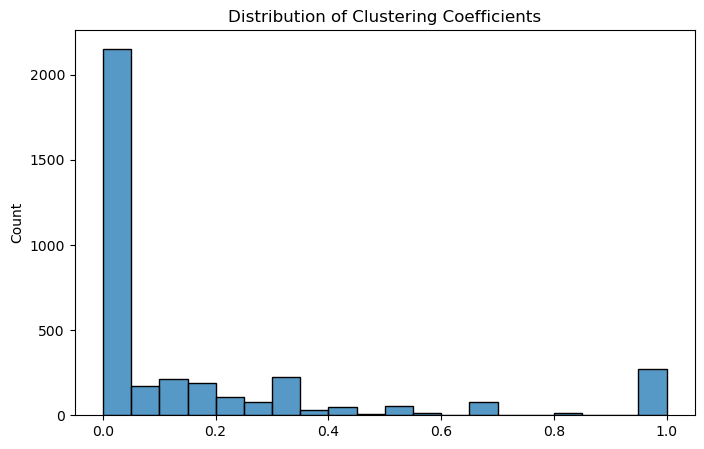

In [8]:
# Create undirected version for clustering analysis (consider only positive edges)
G_undirected = nx.Graph()
for u, v, d in G.edges(data=True):
    if d['weight'] > 0:  # Only consider positive edges
        G_undirected.add_edge(u, v)

# Calculate clustering coefficients
clustering = nx.clustering(G_undirected)
avg_clustering = sum(clustering.values()) / len(clustering)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

plt.figure(figsize=(8, 5))
sns.histplot(list(clustering.values()), bins=20)
plt.title('Distribution of Clustering Coefficients')

3.2 Component Analysis:
~

In [9]:
# Analyze strongly connected components in the directed graph
strongly_connected = list(nx.strongly_connected_components(G))
print(f"Number of strongly connected components: {len(strongly_connected)}")
print(f"Size of largest strongly connected component: {len(strongly_connected[0])}")

# Analyze weakly connected components
weakly_connected = list(nx.weakly_connected_components(G))
print(f"Number of weakly connected components: {len(weakly_connected)}")
print(f"Size of largest weakly connected component: {len(weakly_connected[0])}")

Number of strongly connected components: 540
Size of largest strongly connected component: 1
Number of weakly connected components: 5
Size of largest weakly connected component: 3775


3.3 Path Length Analysis/shortest path



In [10]:
# Create largest strongly connected component subgraph for path analysis
largest_scc = G.subgraph(strongly_connected[0])
path_lengths = dict(nx.all_pairs_shortest_path_length(largest_scc))

# Calculate average path length
total_paths = 0
sum_path_lengths = 0
for source in path_lengths:
    for target in path_lengths[source]:
        if source != target:
            sum_path_lengths += path_lengths[source][target]
            total_paths += 1

avg_path_length = sum_path_lengths / total_paths if total_paths > 0 else 0
print(f"Average shortest path length in largest SCC: {avg_path_length:.4f}")

Average shortest path length in largest SCC: 0.0000


3.4 Community Detection:



Number of communities detected: 54
Size of largest community: 1058


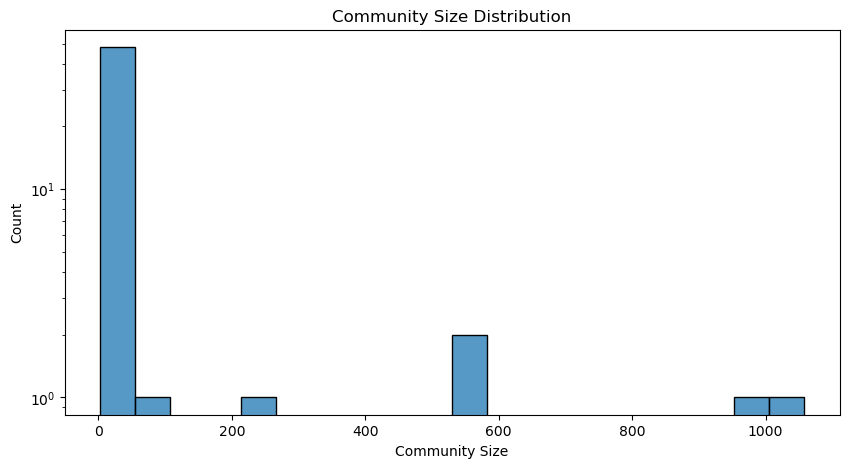

In [13]:
# Only use positive edges for community detection
G_positive = nx.Graph()
for u, v, d in G.edges(data=True):
    if d['weight'] > 0:
        G_positive.add_edge(u, v)

# Apply community detection
communities = nx.community.greedy_modularity_communities(G_positive)
print(f"Number of communities detected: {len(communities)}")
print(f"Size of largest community: {len(communities[0])}")

# Distribution of community sizes
community_sizes = [len(c) for c in communities]
plt.figure(figsize=(10, 5))
sns.histplot(community_sizes, bins=20)
plt.title('Community Size Distribution')
plt.xlabel('Community Size')
plt.yscale('log')

3.5 Trust vs Distrust Analysis:



In [14]:
# Analyze trust and distrust patterns between communities
community_dict = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_dict[node] = i

# Only consider edges between nodes that are in communities
inter_community_edges = []
for u, v, d in G.edges(data=True):
    if u in community_dict and v in community_dict:
        source_comm = community_dict[u]
        target_comm = community_dict[v]
        inter_community_edges.append((source_comm, target_comm, d['weight']))

# Count positive and negative edges within and between communities
same_comm_pos = 0
same_comm_neg = 0
diff_comm_pos = 0
diff_comm_neg = 0

for s_comm, t_comm, weight in inter_community_edges:
    if s_comm == t_comm:  # Same community
        if weight > 0:
            same_comm_pos += 1
        else:
            same_comm_neg += 1
    else:  # Different communities
        if weight > 0:
            diff_comm_pos += 1
        else:
            diff_comm_neg += 1

print(f"Same community positive edges: {same_comm_pos}")
print(f"Same community negative edges: {same_comm_neg}")
print(f"Different community positive edges: {diff_comm_pos}")
print(f"Different community negative edges: {diff_comm_neg}")

Same community positive edges: 16153
Same community negative edges: 723
Different community positive edges: 6497
Different community negative edges: 666
